In [3]:
import numpy as np
import xarray as xr
import cmocean
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinedBackend.figure_format = 'retina'
# the correlation between sea surface temperature and sea ice concentration

In [4]:
! wget ftp://ftp.cdc.noaa.gov/Datasets/noaa.oisst.v2/sst.mnmean.nc
! gunzip sst.mnmean.nc
sst_data = xr.open_dataset('sst.mnmean.nc')
sst_data

--2019-12-03 04:20:56--  ftp://ftp.cdc.noaa.gov/Datasets/noaa.oisst.v2/sst.mnmean.nc
           => ‘sst.mnmean.nc’
Resolving ftp.cdc.noaa.gov (ftp.cdc.noaa.gov)... 140.172.38.117
Connecting to ftp.cdc.noaa.gov (ftp.cdc.noaa.gov)|140.172.38.117|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Datasets/noaa.oisst.v2 ... done.
==> SIZE sst.mnmean.nc ... 58983604
==> PASV ... done.    ==> RETR sst.mnmean.nc ... done.
Length: 58983604 (56M) (unauthoritative)

sst.mnmean.nc       100%[===================>]  56.25M  1.61MB/s    in 30s     

2019-12-03 04:21:26 (1.89 MB/s) - ‘sst.mnmean.nc’ saved [58983604]

gzip: sst.mnmean.nc: unknown suffix -- ignored


<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, nbnds: 2, time: 455)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2019-10-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oiss...
    dataset_title:  NOAA Optimum Interpolation (OI) SST V

In [5]:
! wget ftp://ftp.cdc.noaa.gov/Datasets/noaa.oisst.v2/icec.mnmean.nc
! gunzip icec.mnmean.nc
icec_data = xr.open_dataset('icec.mnmean.nc')
icec_data

--2019-12-03 04:21:27--  ftp://ftp.cdc.noaa.gov/Datasets/noaa.oisst.v2/icec.mnmean.nc
           => ‘icec.mnmean.nc’
Resolving ftp.cdc.noaa.gov (ftp.cdc.noaa.gov)... 140.172.38.117
Connecting to ftp.cdc.noaa.gov (ftp.cdc.noaa.gov)|140.172.38.117|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Datasets/noaa.oisst.v2 ... done.
==> SIZE icec.mnmean.nc ... 58983704
==> PASV ... done.    ==> RETR icec.mnmean.nc ... done.
Length: 58983704 (56M) (unauthoritative)

icec.mnmean.nc      100%[===================>]  56.25M  1.39MB/s    in 41s     

2019-12-03 04:22:08 (1.39 MB/s) - ‘icec.mnmean.nc’ saved [58983704]

gzip: icec.mnmean.nc: unknown suffix -- ignored


<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, nbnds: 2, time: 455)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2019-10-01
Dimensions without coordinates: nbnds
Data variables:
    icec       (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:51:42 2005: ncks -d time,0,278 SAVEs/icec.m...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oiss...
    NCO:            4.0.0
    dataset_title:  NOAA Optimu

# Anomalies for SST and ICEC

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/events.py:88: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


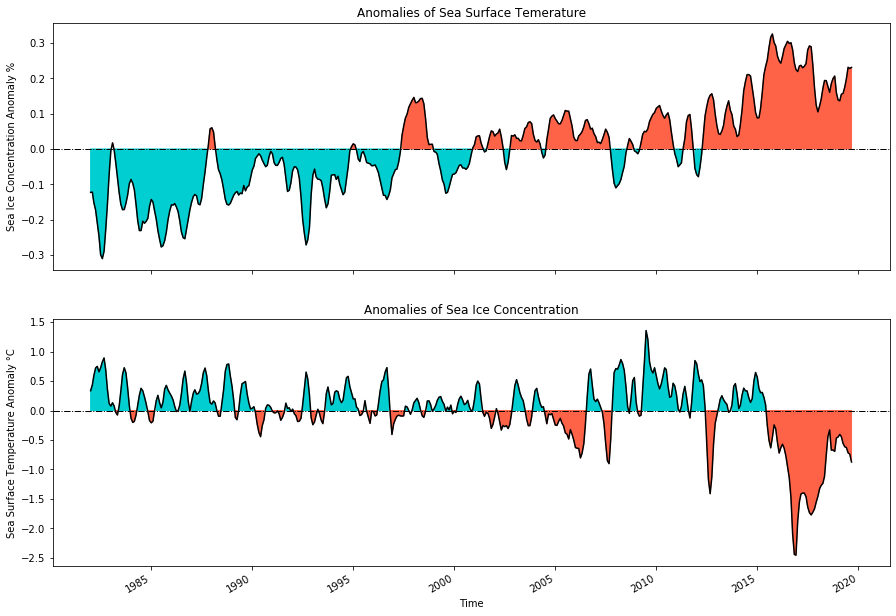

In [6]:
# the anomalies of both sea surface temperature and sea ice concentration from 1982 to 2019
fig,ax = plt.subplots(figsize=(15,10), nrows=2)

gb_sst = sst_data.groupby('time.month')
# the reference values I used to calculate the anomalies are the mean values of both datasets
sst_anom = gb_sst - gb_sst.mean(dim='time')
sst_rolling = sst_anom.rolling(time=3, center=True).mean()
sst_mean = sst_rolling.sst.mean(dim=('lat','lon'))
sst_mean.plot(ax=ax[0], c='K')
ax[0].axhline(y=0, c='K', linewidth=1, linestyle='dashdot')
ax[0].set_title('Anomalies of Sea Surface Temerature')
ax[0].set_ylabel('Sea Ice Concentration Anomaly %')
ax[0].label_outer()
date_sst = sst_mean.time.values
# to help understanding the trends, I also apply fill_between to these lines
ax[0].fill_between(date_sst, sst_mean.where(sst_mean>0), 0, color='tomato')
ax[0].fill_between(date_sst, sst_mean.where(sst_mean<0), 0, color='darkturquoise')

gb_icec = icec_data.groupby('time.month') 
icec_anom = gb_icec - gb_icec.mean(dim='time')
icec_rolling = icec_anom.rolling(time=3, center=True).mean()
icec_mean = icec_rolling.icec.mean(dim=('lat','lon'))
icec_mean.plot(ax=ax[1], c='K')
ax[1].axhline(y=0, c='K', linewidth=1, linestyle='dashdot')
ax[1].set_title('Anomalies of Sea Ice Concentration')
ax[1].set_ylabel('Sea Surface Temperature Anomaly °C')
date_icec = icec_mean.time.values
ax[1].fill_between(date_icec, icec_mean.where(icec_mean<0), 0, color='tomato')
ax[1].fill_between(date_icec, icec_mean.where(icec_mean>0), 0, color='darkturquoise')

# Comparison of Global SST in 1982 and in 2019

Text(0, 0.5, 'Longitude')

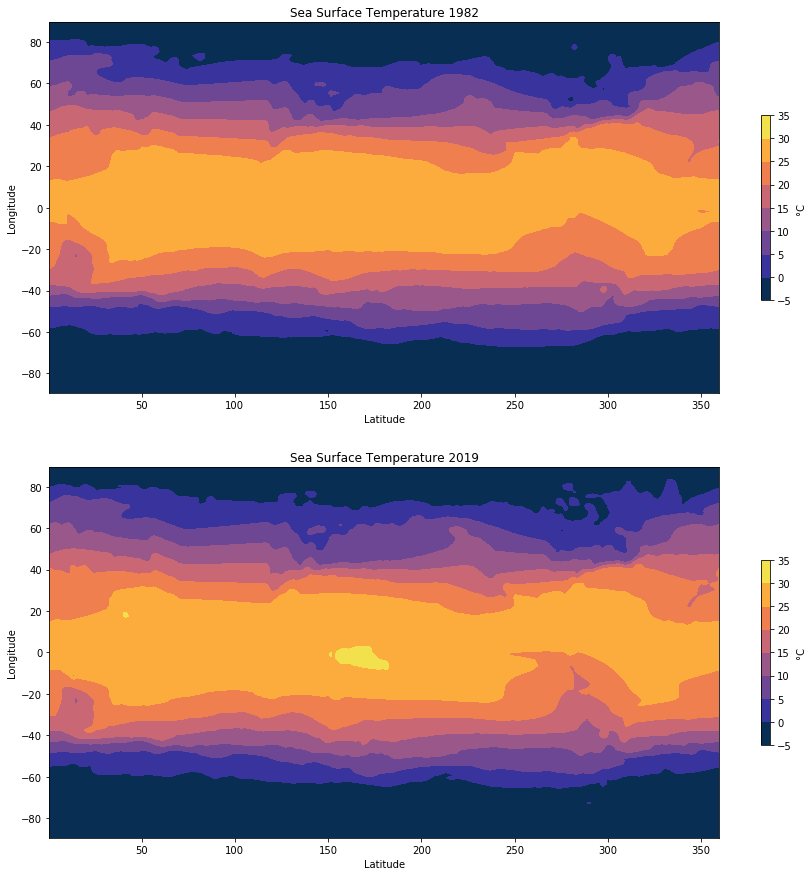

In [7]:
# the comparison of global sea surface temperature in 1982 and in 2019.
fig,ax = plt.subplots(figsize=(15,15), nrows=2)

# for the mean temperature of 1982, I sliced the data between July 1st, 1982 and July 1st, 1983 out and calculated the mean value based on time dimension
sst_1982 = sst_data.sel(time=slice('1982-07-01','1983-07-01'))
sst_1982_mean = sst_1982.sst.mean(dim='time')
sstlevel = np.arange(-5, 40, 5)
# used the filled contours to plot the global sea surface temperature map for both 1982 and 2019
globmap_sst_1982 = ax[0].contourf(sst_1982_mean.lon, sst_1982_mean.lat, sst_1982_mean,
                                  sstlevel,
                                  cmap=cmocean.cm.thermal,
                                  extent='both')
cbglob_sst_1982 = fig.colorbar(globmap_sst_1982, shrink=0.5, ax=ax[0])
cbglob_sst_1982.set_label('°C')
ax[0].set_title('Sea Surface Temperature 1982')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

sst_2019 = sst_data.sel(time=slice('2018-07-01','2019-07-01'))
sst_2019_mean = sst_2019.sst.mean(dim='time')
globmap_sst_2019 = ax[1].contourf(sst_2019_mean.lon, sst_2019_mean.lat, sst_2019_mean,
                                  sstlevel,
                                  cmap=cmocean.cm.thermal,
                                  extent='both')
cbglob_sst_2019 = fig.colorbar(globmap_sst_2019, shrink=0.5, ax=ax[1])
cbglob_sst_2019.set_label('°C')
ax[1].set_title('Sea Surface Temperature 2019')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')
# the temperature become higher in 2019, especially in the polar area and equator

# Comparison of Global ICEC in 1982 and 2019

Text(0, 0.5, 'Longitude')

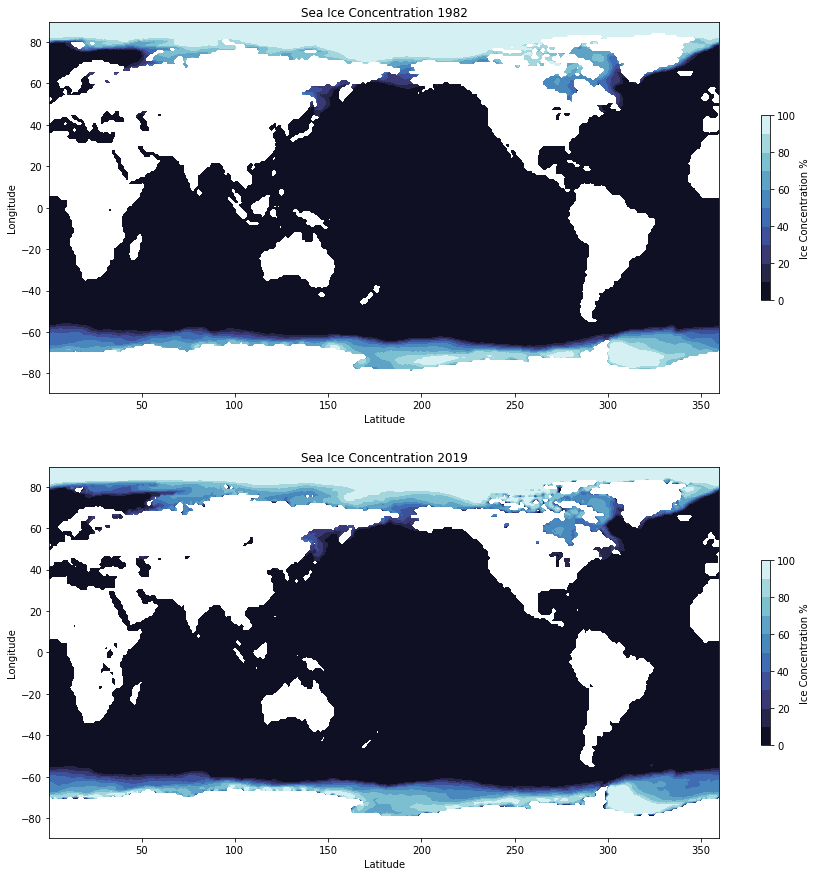

In [8]:
# basically same as the second figure, except it shows sea ice concentration
fig,ax = plt.subplots(figsize=(15,15), nrows=2)

icec_1982 = icec_data.sel(time=slice('1982-07-01','1983-07-01'))
icec_1982_mean = icec_1982.icec.mean(dim='time')
iceclevel = np.arange(0, 110, 10)
globmap_icec_1982 = ax[0].contourf(icec_1982_mean.lon, icec_1982_mean.lat, icec_1982_mean,
                                   iceclevel,
                                   cmap=cmocean.cm.ice,
                                   extent='both',
                                   vmin=0, vmax=100)
cbglob_icec_1982 = fig.colorbar(globmap_icec_1982, shrink=0.5, ax=ax[0])
cbglob_icec_1982.set_label('Ice Concentration %')
ax[0].set_title('Sea Ice Concentration 1982')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

icec_2019 = icec_data.sel(time=slice('2018-07-01','2019-07-01'))
icec_2019_mean = icec_2019.icec.mean(dim='time')
globmap_icec_2019 = ax[1].contourf(icec_2019_mean.lon, icec_2019_mean.lat, icec_2019_mean,
                                   iceclevel,
                                   cmap=cmocean.cm.ice,
                                   extent='both',
                                   vmin=0, vmax=100)
cbglob_icec_2019 = fig.colorbar(globmap_icec_2019, shrink=0.5, ax=ax[1])
cbglob_icec_2019.set_label('Ice Concentration %')
ax[1].set_title('Sea Ice Concentration 2019')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')
# there are some decrease for sea ice concentration in both polar areas

# Further Comparison of SST in Arctic Area

Text(0.5, 1.0, 'Sea Surface Temperature 2019')

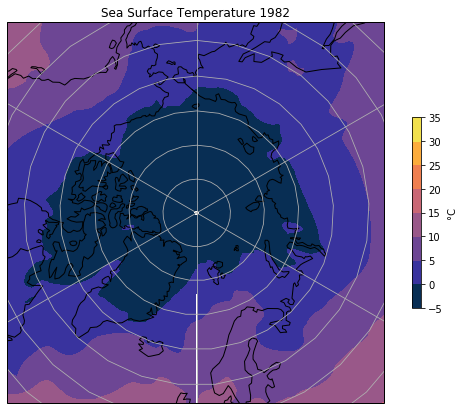

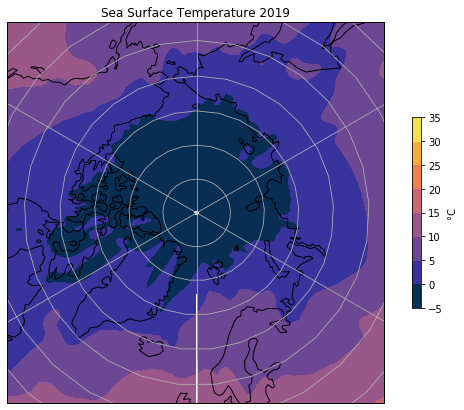

In [9]:
# to make the correlation easier to observe, I researched a specific area, which is arctic. Since arctic area has much lesser continents, it is better to see the 
# distribution of sea ice

#  first plot the sea surface temperature of arctic area in 1982 and 2019
fig_sst_1982 = plt.figure(figsize=(10,7))
extent = [180, -180 , 57 , 90]
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
sstmap_1982 = ax.contourf(sst_1982_mean.lon, sst_1982_mean.lat, sst_1982_mean,
                          sstlevel,
                          cmap=cmocean.cm.thermal, 
                          extent='both',
                          transform=ccrs.PlateCarree())
cb_sst_1982 = fig_sst_1982.colorbar(sstmap_1982, shrink=0.5)
cb_sst_1982.set_label('°C')
ax.set_title('Sea Surface Temperature 1982')

fig_sst_2019 = plt.figure(figsize=(10,7))
extent = [180, -180 , 57 , 90]
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
sstmap_2019 = ax.contourf(sst_2019_mean.lon, sst_2019_mean.lat, sst_2019_mean,
                          sstlevel,
                          cmap=cmocean.cm.thermal,
                          extent='both',
                          transform=ccrs.PlateCarree())
cb_sst_2019 = fig_sst_2019.colorbar(sstmap_2019, shrink=0.5)
cb_sst_2019.set_label('°C')
ax.set_title('Sea Surface Temperature 2019')
# comparing with the global map before, here can more clearly see the increase of the sea surface temperature, as the dark blue area has significantly decreased

# Further Comparison of ICEC in Arctic Area

Text(0.5, 1.0, 'Sea Ice in Arctic Area 2019')

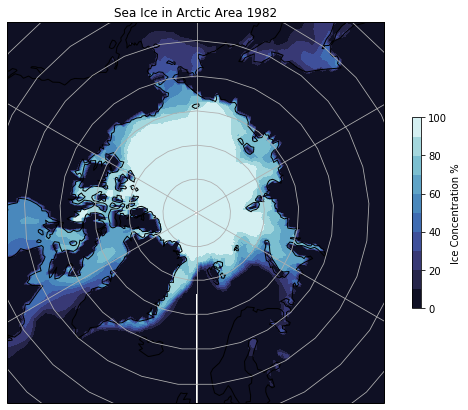

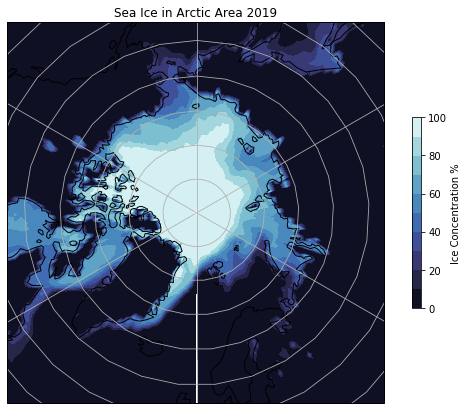

In [10]:
fig_icec_1982 = plt.figure(figsize=(10,7))
extent = [180, -180 , 57 , 90]
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
icec_1982_where = icec_1982_mean.where(icec_1982_mean>0, 0)
icemap_1982 = ax.contourf(icec_1982_where.lon, icec_1982_where.lat, icec_1982_where,
                          iceclevel,
                          cmap=cmocean.cm.ice, 
                          extent='both', 
                          transform=ccrs.PlateCarree())
cb_icec_1982 = fig_icec_1982.colorbar(icemap_1982, shrink=0.5)
cb_icec_1982.set_label('Ice Concentration %')
ax.set_title('Sea Ice in Arctic Area 1982')

fig_icec_2019 = plt.figure(figsize=(10,7))
extent = [180, -180 , 57 , 90]
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
# much of the space are filled with white, since there are no data in those area, such as continent
# however, white is closed to the color representing high sea ice concentration, leading confusion
# to eliminate the confusion, I use “Where” to replace the Nah value with 0, indicating there are no sea ice
icec_2019_where = icec_2019_mean.where(icec_2019_mean>0, 0)
icemap_2019 = ax.contourf(icec_2019_where.lon, icec_2019_where.lat, icec_2019_where,
                          iceclevel,
                          cmap=cmocean.cm.ice,
                          extent='both',
                          transform=ccrs.PlateCarree())
cb_icec_2019 = fig_icec_2019.colorbar(icemap_2019, shrink=0.5)
cb_icec_2019.set_label('Ice Concentration %')
ax.set_title('Sea Ice in Arctic Area 2019')
# as the light blue area has significantly decreased, sea ice concentration reduced a lot from 1982 to 2019

In [11]:
# based on the figures above, we can clearly find the negative correlation between sea ice concentration and sea surface temperature 
# also indicate that global warming result the increase of sea surface temperature and decrease of sea ice concentration

# when I first plot the dataset directly, I found the resolution was low and the whole plot looks pretty coarse
# then, I used filled contours instead to improve the figure and make it looks better